In [1]:
import pandas as pd

In [7]:
f = open('f1-rs100.txt', 'r', encoding='UTF-8')
data = f.read()

In [21]:
data

,0,1,2
0,0.500421,0.082954,10.0
1,0.506254,0.093301,11.0
2,0.524964,0.100540,12.0
3,0.536321,0.105696,13.0
4,0.534638,0.102725,14.0
...,...,...,...
95,0.862000,0.032887,105.0
96,0.863619,0.035177,106.0
97,0.865195,0.036166,107.0
98,0.870102,0.034793,108.0


In [18]:
data = pd.read_csv('f1-rs100.txt', sep="\t", header=None)
datadf=pd.DataFrame({'Step':data[2],'F1-score':data[0],'Deviation':data[1]})
datadf

,Step,F1-score,Deviation
0,10.0,0.500421,0.082954
1,11.0,0.506254,0.093301
2,12.0,0.524964,0.100540
3,13.0,0.536321,0.105696
4,14.0,0.534638,0.102725
...,...,...,...
95,105.0,0.862000,0.032887
96,106.0,0.863619,0.035177
97,107.0,0.865195,0.036166
98,108.0,0.870102,0.034793


In [34]:
data1 = pd.read_csv('f1-us.txt', sep="\t", header=None)
data1df=pd.DataFrame({'Step':data1[2],'F1-score':data1[0],'Deviation':data1[1]})
data1df

,Step,F1-score,Deviation
0,10.0,0.500421,0.082954
1,11.0,0.512819,0.082243
2,12.0,0.554506,0.086097
3,13.0,0.579234,0.062080
4,14.0,0.593524,0.069385
...,...,...,...
95,105.0,0.987147,0.006861
96,106.0,0.989081,0.006523
97,107.0,0.989397,0.006955
98,108.0,0.989704,0.006794


In [ ]:
data1df

In [27]:
import matplotlib.pyplot as plt

In [35]:
x1 = data1df['Step']
y11 = data1df['F1-score'] + data1df['Deviation']
y21 = data1df['F1-score'] - data1df['Deviation']

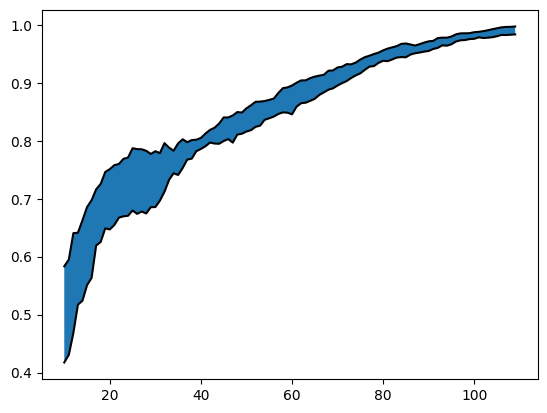

In [36]:
fig, ax = plt.subplots()
ax.plot(x1, y11, "k")
ax.plot(x1, y21, "k")
ax.fill_between(x1, y11, y21)

plt.show()

In [ ]:
joinstyle 	{'miter', 'round', 'bevel'}

In [31]:
x = datadf['Step']
y1 = datadf['F1-score'] + datadf['Deviation']
y2 = datadf['F1-score'] - datadf['Deviation']

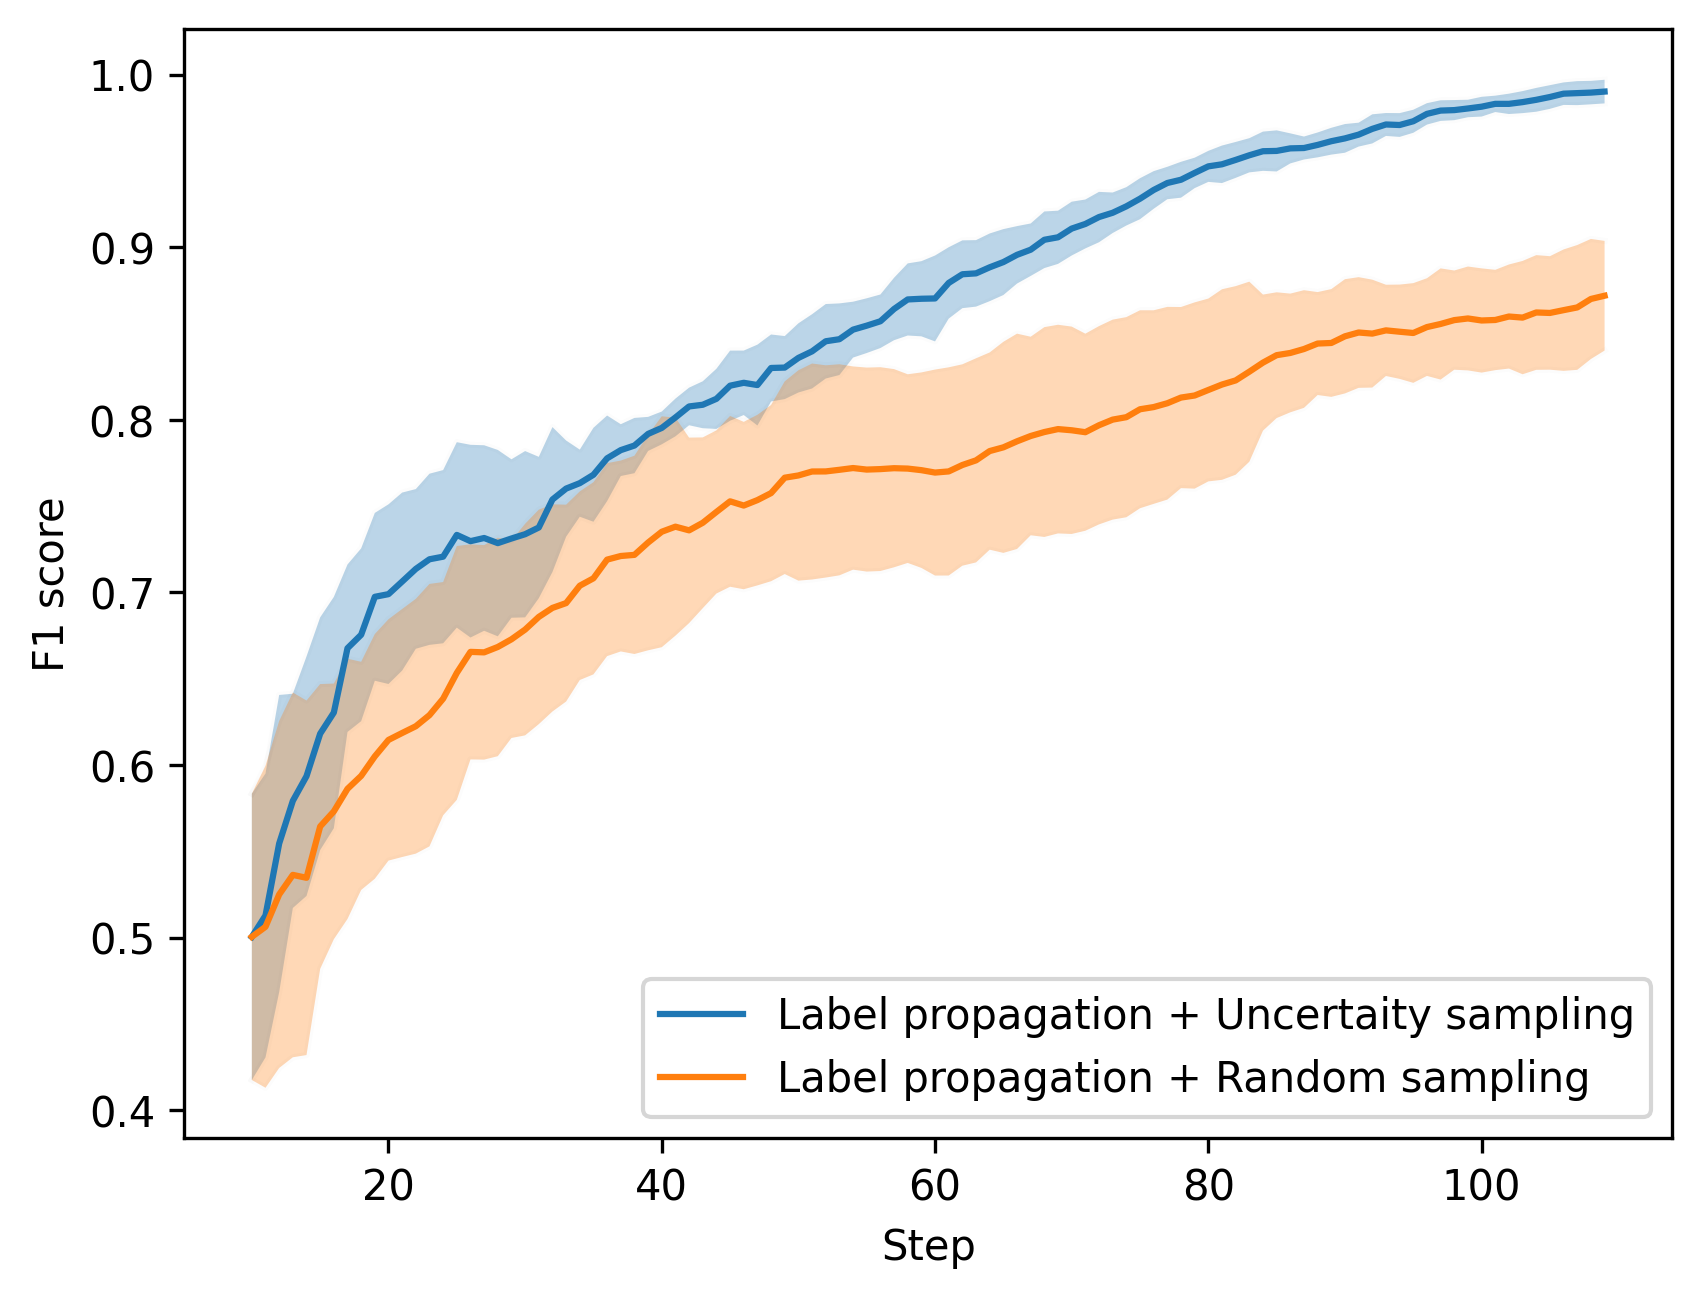

In [269]:
from matplotlib.lines import lineStyles
plt.figure(dpi=300)
plt.plot(x1, y11, "k",alpha=0.01)
plt.plot(x1, y21, "k",alpha=0.01)
plt.fill_between(x1, y11, y21,alpha=0.3, linewidth=0.01)
plt.plot(x,data1df['F1-score'],label="Label propagation + Uncertaity sampling")


plt.plot(x, y1, "k",alpha=0.01)
plt.plot(x, y2, "k",alpha=0.01)
plt.fill_between(x, y1, y2,alpha=0.30)
plt.plot(x,datadf['F1-score'],label="Label propagation + Random sampling")

plt.xlabel('Step')
plt.ylabel('F1 score')
plt.legend()
plt.show()

In [ ]:
###### RS vs US 50 points

In [95]:
import numpy as np
import os.path
import matplotlib.pyplot as plt
import sys
import datetime
import matplotlib.cm as cm
import csv

import time

import sklearn
from scipy import stats
import sklearn.semi_supervised
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

import argparse

import random
from sklearn.metrics import f1_score

In [109]:

#########################

# number of multiprobe
num_multi = 1


# initial number
initial_num = 5

# iteration number
itt_num = 10


input_data = 'data.csv'
f = open(input_data, 'r')

In [110]:
ternary_data_list = []

label_list_true = []

data_list = []

data_list2d = []

co_num=[]
label_list_text = []
reader = csv.reader(f)
for row in reader:
    label_list_text.append(row[0])
    data_list.append([float(row[1]),float(row[2])])
    data_list2d.append([float(row[1]),float(row[2])])

existed_phase=list(set(label_list_text))
existed_phase.sort()


for i in range(len(label_list_text)):

    for j in range(len(existed_phase)):

        if label_list_text[i]==existed_phase[j]:

            label_list_true.append(j)

    co_num.append(label_list_text[i].count("+")+1)


total_index_list = [i for i in range(len(label_list_true))]

In [111]:
f1_res_tot = []

num_phase_res_tot = []

num_data_res_tot = []


def sampling(label_train,labeled_index_list,unlabeled_index_list):
    #设置预测的模型
    lp_model = sklearn.semi_supervised.LabelSpreading()
    lp_model.fit(data_list_std, label_train)
    #预测未知的数据的标签
    predicted_labels = lp_model.transduction_[unlabeled_index_list]
    #预测所有数据的标签
    predicted_all_labels = lp_model.transduction_
    classes = lp_model.classes_
    label_distributions = lp_model.label_distributions_[unlabeled_index_list]
    label_distributions_all = lp_model.label_distributions_
    # uncertaity score 计算
    u_score_list = 1 - np.max(label_distributions, axis = 1)

    # most uncertain point
    uncertainty_index = [unlabeled_index_list[np.argmax(u_score_list)]]
    US_point_prob = label_distributions[np.argmax(u_score_list)]

    # all ranking of uncertain point
    ranking = np.array(u_score_list).argsort()[::-1]
    multi_uncertainty_index = [unlabeled_index_list[ranking[i]] for i in range(len(unlabeled_index_list))]

    return multi_uncertainty_index,label_distributions,u_score_list,ranking,predicted_all_labels

In [184]:
labeled_index_list = random.sample(total_index_list, initial_num)

In [185]:
len(labeled_index_list)

5

In [186]:
label_list = []

for i in range(len(label_list_true)):

    if i in labeled_index_list:
        label_list.append(label_list_true[i])

    else:
        label_list.append(-1)


label_train = np.copy(label_list)


dimension = len(data_list[0])

data_list = np.array(data_list)
data_list2d = np.array(data_list2d)
ss = StandardScaler()
ss.fit(data_list)
data_list_std = ss.transform(data_list)

In [187]:
colours = ['#FAD3CF' ,'#2470A0', '#A797C8']
unlabeled_index_list = list(set(total_index_list) - set(labeled_index_list))

In [188]:
labeled_index_list

[142, 64, 3, 121, 389]

In [189]:
###RS vs US image

In [190]:
labeled_index_list_us = labeled_index_list.copy()
unlabeled_index_list_us = unlabeled_index_list.copy()

In [191]:
num_phase_res = []

num_data_res = []

f1_res = []

save_labeled = []

save_labeled_idx = []

save_unlabeled = []

save_unlabeled_idx = []

save_u_score = []

save_predicted = []


###RS_contents


for i in range(50):
    print("iteration =", i)

    label_list = []

    for i in range(len(label_list_true)):

        if i in labeled_index_list:
            label_list.append(label_list_true[i])

        else:
            label_list.append(-1)

    
    label_train = np.copy(label_list)


    dimension = len(data_list[0])

    data_list = np.array(data_list)
    data_list2d = np.array(data_list2d)
    ss = StandardScaler()
    ss.fit(data_list)
    data_list_std = ss.transform(data_list)

    multi_uncertainty_index,label_distributions,u_score_list,ranking,predicted_all_labels \
        = sampling(label_train,labeled_index_list,unlabeled_index_list)

    US_point = multi_uncertainty_index[0:num_multi]

    f1_res.append(f1_score(label_list_true, list(predicted_all_labels), average="macro"))

    label_list = []

    for i in range(len(label_list_true)):

        if i in labeled_index_list:
            label_list.append(label_list_true[i])

    labeled_index_list = labeled_index_list + US_point


    unlabeled_index_list = list(set(unlabeled_index_list) - set(US_point))

    print("f1", f1_score(label_list_true, list(predicted_all_labels), average="macro"))

    num_phase_res.append(len(set(label_list)))
    
    num_data_res.append(len(labeled_index_list)) 

    save_labeled.append(labeled_index_list)

    save_unlabeled.append(unlabeled_index_list)

    save_u_score.append(u_score_list)

    save_predicted.append(predicted_all_labels)

iteration = 0
f1 0.39644188375718903
iteration = 1
f1 0.4204439539682227
iteration = 2
f1 0.46745840042941494
iteration = 3
f1 0.5298584660017904
iteration = 4
f1 0.5218106937699466
iteration = 5
f1 0.6308327824709145
iteration = 6
f1 0.6267924670114667
iteration = 7
f1 0.6455732038757515
iteration = 8
f1 0.6524019024709676
iteration = 9
f1 0.6518147032546023
iteration = 10
f1 0.6850127168832582
iteration = 11
f1 0.6690656590073732
iteration = 12
f1 0.675687241266012
iteration = 13
f1 0.6795959516371991
iteration = 14
f1 0.6739935237542892
iteration = 15
f1 0.6776705566807784
iteration = 16
f1 0.6783156803296978
iteration = 17
f1 0.6705172967315395
iteration = 18
f1 0.6744177784224066
iteration = 19
f1 0.6772288098375054
iteration = 20
f1 0.6843090786352493
iteration = 21
f1 0.6806366527936594
iteration = 22
f1 0.684925340360123
iteration = 23
f1 0.6916816269500575
iteration = 24
f1 0.6916816269500575
iteration = 25
f1 0.6946498452707432
iteration = 26
f1 0.69224590324009
iteration = 2

In [192]:
len(save_labeled)

50

In [193]:
sum_labeled_label = []
for i in save_labeled[-1]:
    sum_labeled_label.append(label_list_true[i])

In [ ]:
save_labeled[0]

In [228]:
save_labeled[0]

[142, 64, 3, 121, 389, 193]

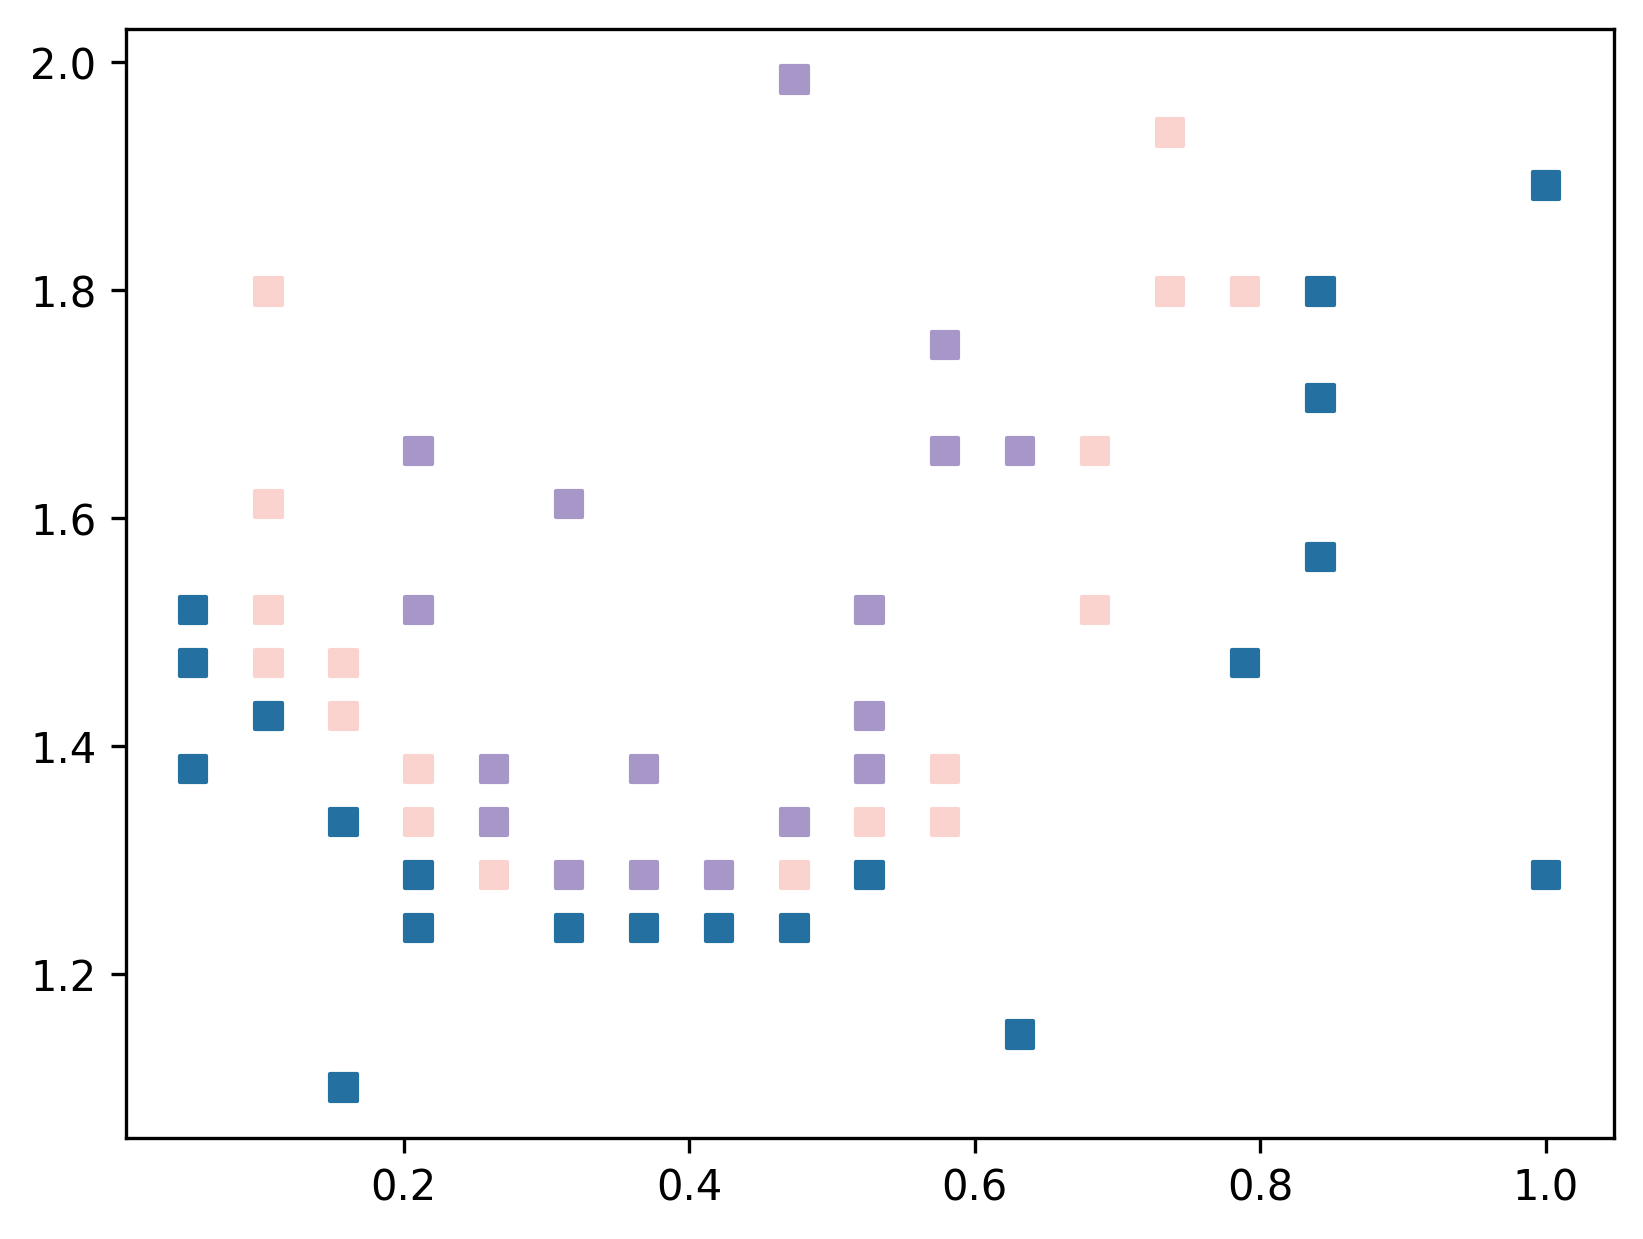

In [226]:

plt.figure(dpi=300)
plt.scatter(data_list2d[save_labeled[-1]].T[0],data_list2d[save_labeled[-1]].T[1],c=[colours[i] for i in sum_labeled_label], marker='s',s=40)
plt.show()

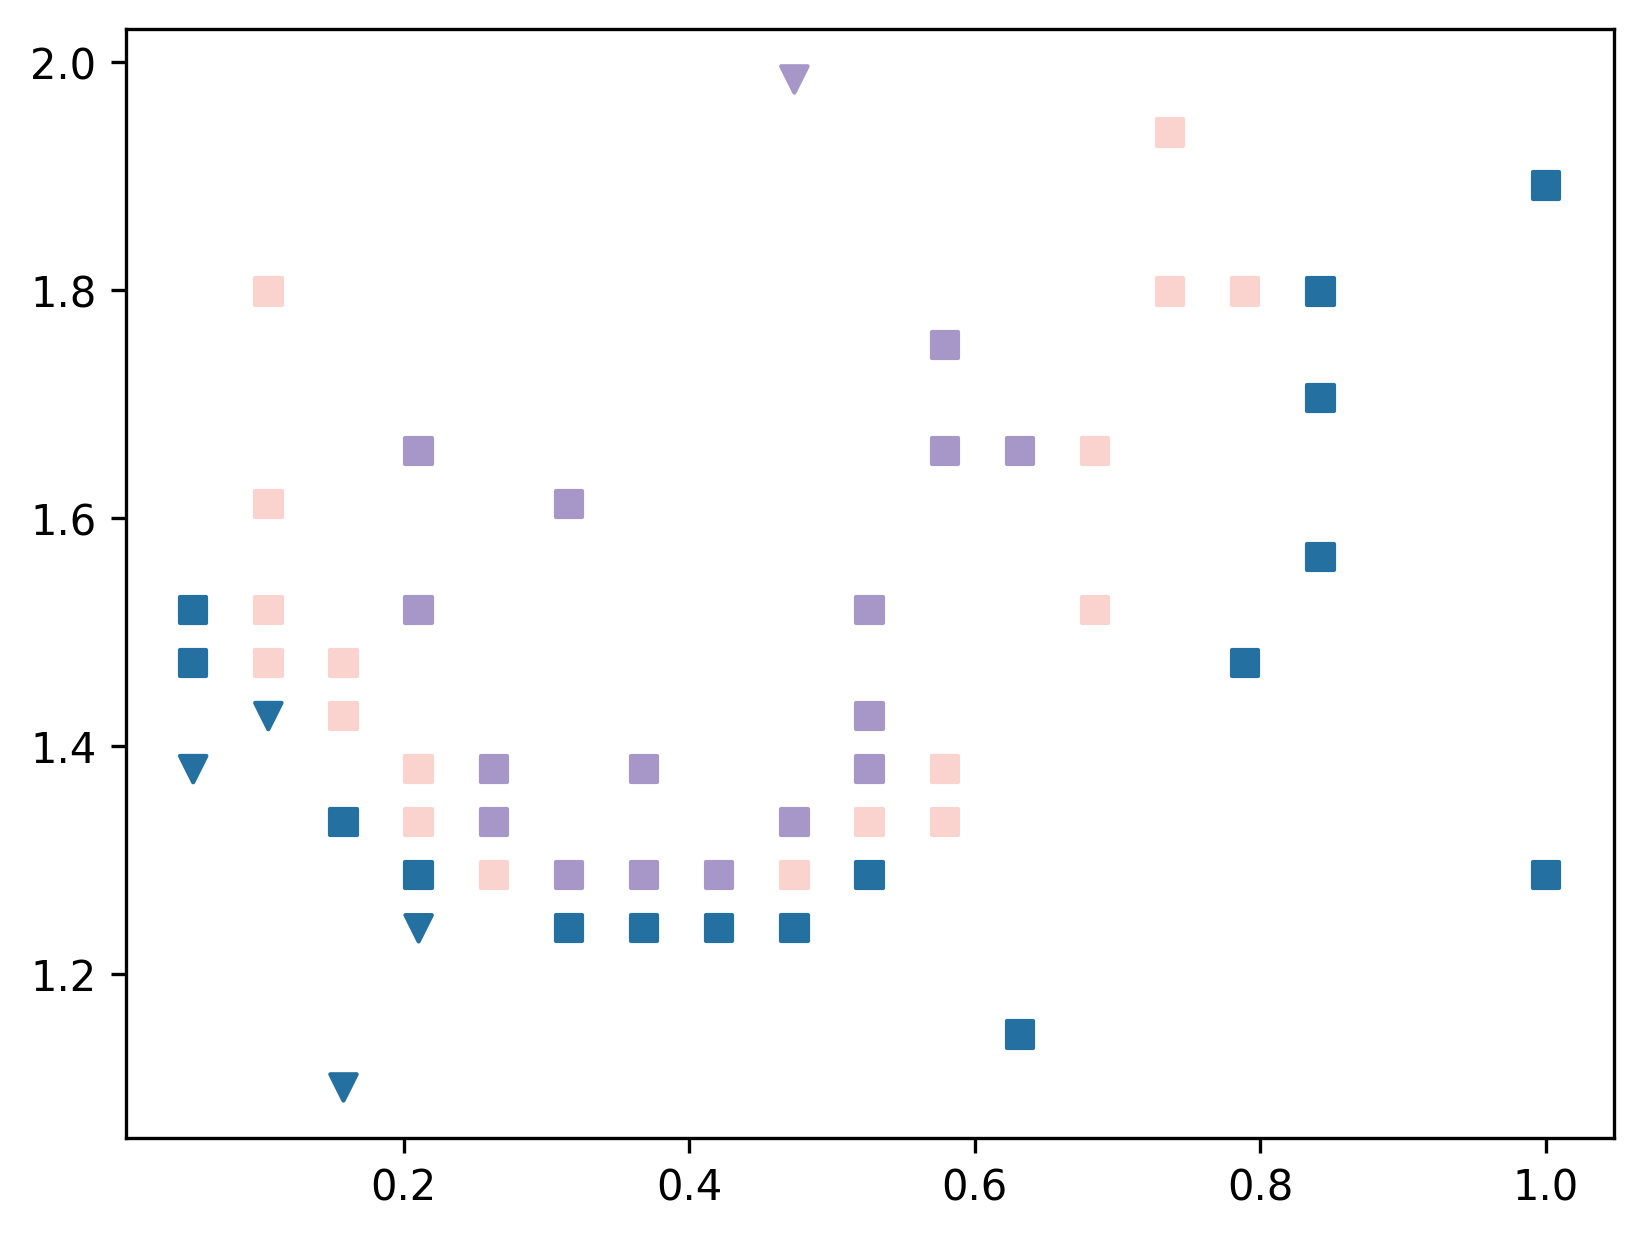

In [263]:

plt.figure(dpi=300)
plt.scatter(data_list2d[save_labeled[-1]].T[0][5:],data_list2d[save_labeled[-1]].T[1][5:],c=[colours[i] for i in sum_labeled_label][5:], marker='s',s=40)

plt.scatter(data_list2d[save_labeled[-1]].T[0][:5],data_list2d[save_labeled[-1]].T[1][:5],c=[colours[i] for i in sum_labeled_label][:5], marker='v',s=40)
plt.show()

In [236]:
data_list2d[save_labeled[-1]].T[0].shape

(55,)

In [234]:
#RS

save_labeled[0][:5]

[142, 64, 3, 121, 389]

In [233]:
len(save_unlabeled[0])

394

In [237]:
random_permutation = np.random.permutation(save_unlabeled[0])
uncertainty_index = random_permutation[:50]
len(uncertainty_index)

50

In [242]:
rs_idx_list = uncertainty_index.tolist()+save_labeled[0][:5]

In [248]:
label_list_rs = []

for i in rs_idx_list:
    label_list_rs.append(label_list_true[i])

In [249]:
# labeled_index_list_us = labeled_index_list.copy()
# unlabeled_index_list_us = unlabeled_index_list.copy()

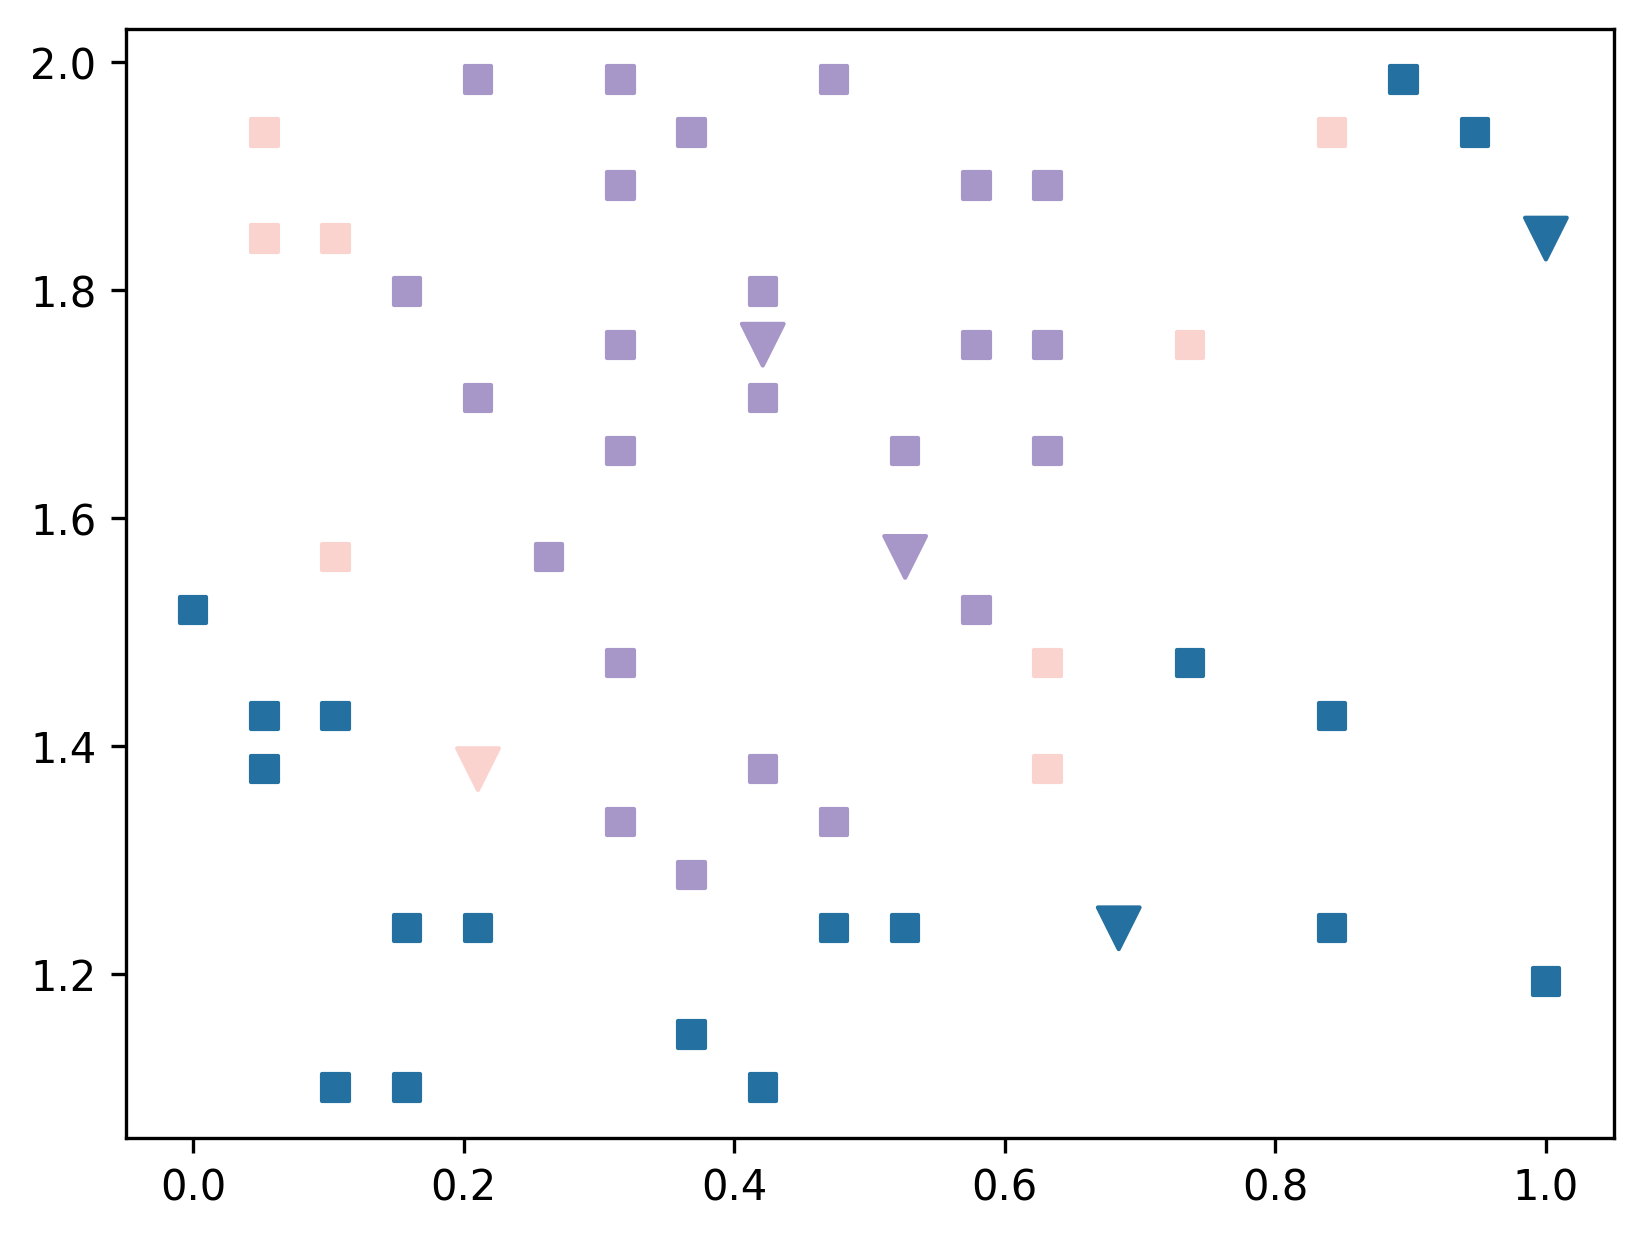

In [264]:
plt.figure(dpi=300)
plt.scatter(data_list2d[rs_idx_list].T[0][5:],data_list2d[rs_idx_list].T[1][5:],c=[colours[i] for i in label_list_rs[5:]], marker='s',s=40)
plt.scatter(data_list2d[rs_idx_list].T[0][:5],data_list2d[rs_idx_list].T[1][:5],c=[colours[i] for i in label_list_rs][:5], marker='v',s=100)

plt.show()

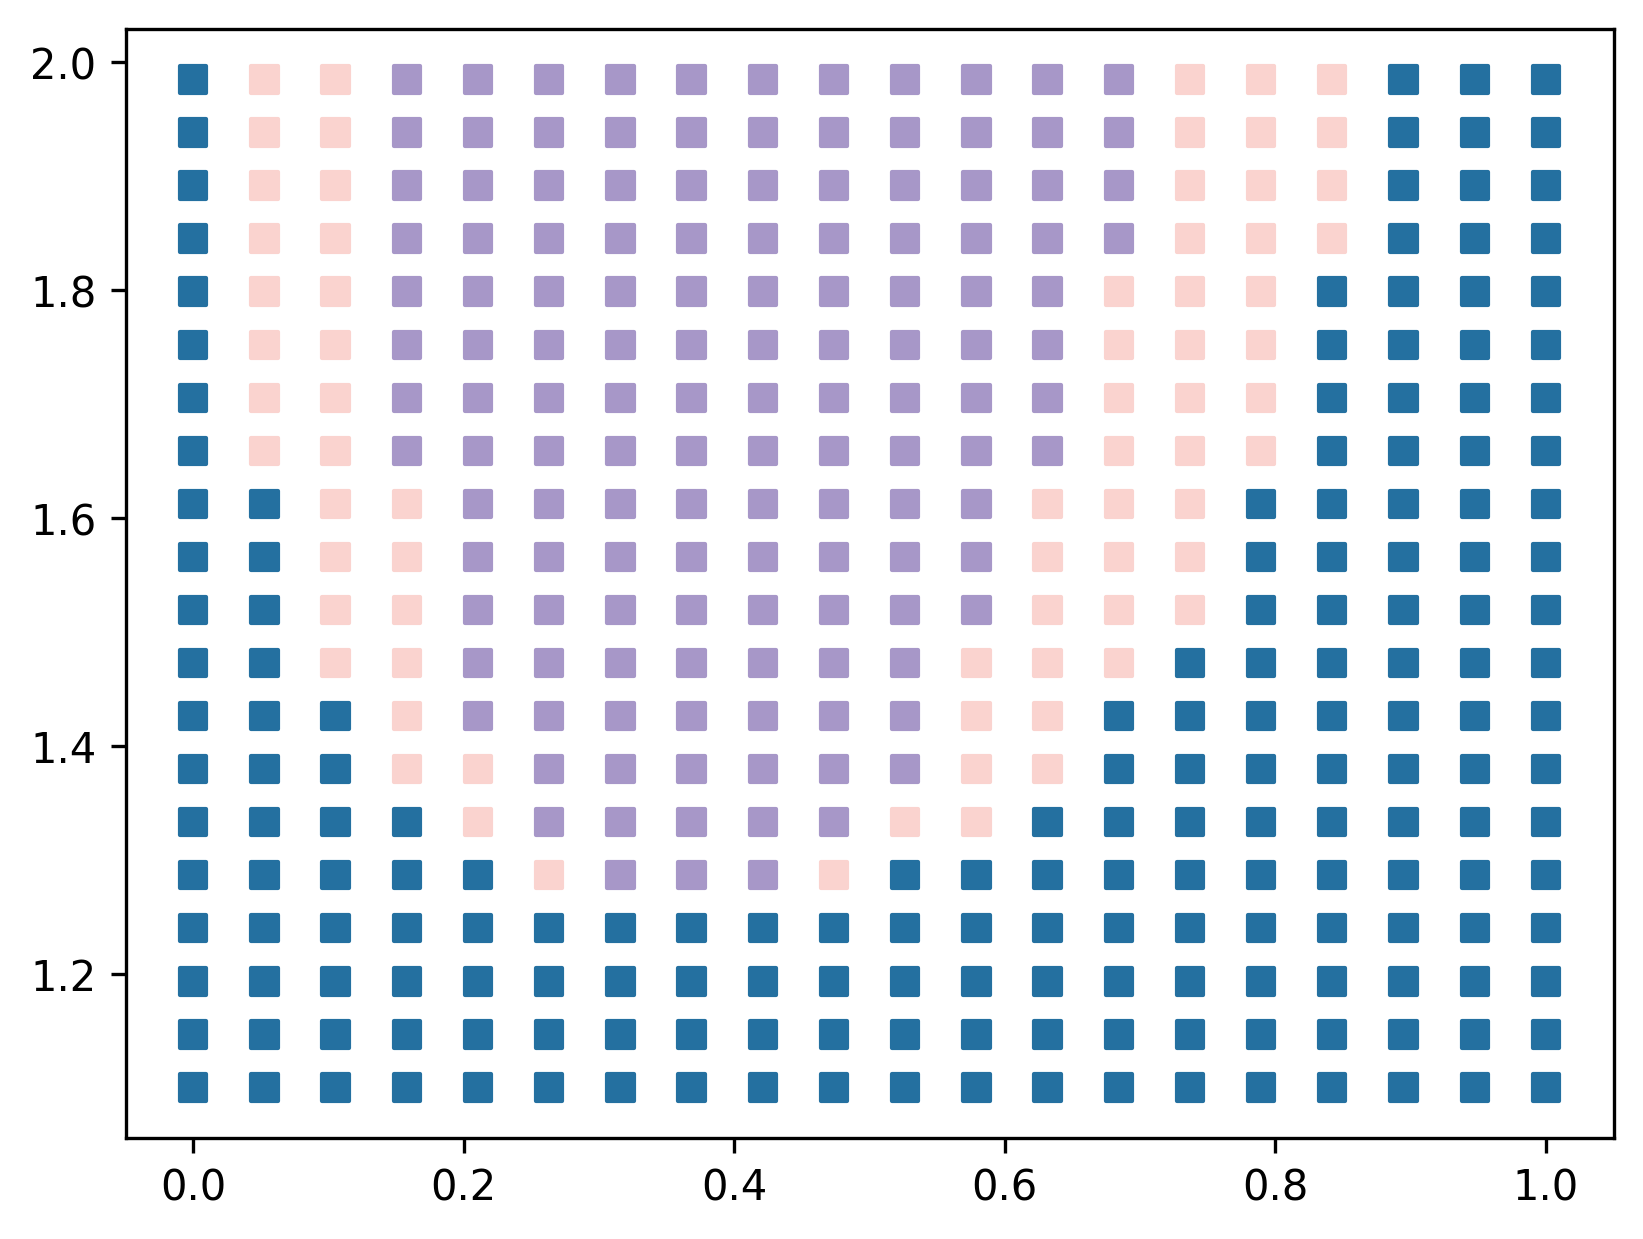

In [268]:
plt.figure(dpi=300)
plt.scatter(data_list2d.T[0],data_list2d.T[1],c=[colours[i] for i in label_list_true], marker='s',s=40)

plt.show()

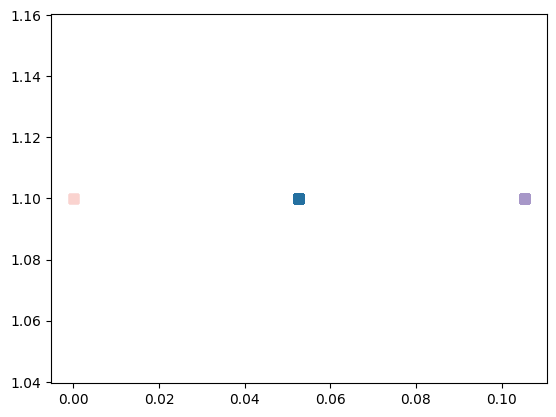

In [215]:
plt.scatter(data_list2d[sum_labeled_label_rs].T[0],data_list2d[sum_labeled_label_rs].T[1],c=[colours[i] for i in sum_labeled_label_rs], marker='s',s=40)
plt.show()

In [ ]:
plt.figure(dpi=300)
